# Tableau data

### NYC Lat Long data for plotting

This notebook is quick and dirty! Just preparing data for tableau visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/newyork/NYClatlong.csv').iloc[:,1:]
df.rename({'neighbourhood_cleansed': 'neighborhood', 
           'host_is_superhost': 'superhost',
           'is_business_travel_ready': 'business'
          }, axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48852 entries, 0 to 48851
Data columns (total 12 columns):
id               48852 non-null int64
neighborhood     48852 non-null object
price            48852 non-null object
city             48791 non-null object
state            48851 non-null object
zipcode          48172 non-null object
accommodates     48852 non-null int64
latitude         48852 non-null float64
longitude        48852 non-null float64
superhost        48746 non-null object
property_type    48852 non-null object
business         48852 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.5+ MB


In [2]:
def str2bool(x):
    return str(x).lower() == 't'

df['superhost'] = df.superhost.apply(str2bool)
df['business'] = df.business.apply(str2bool)


def clean_price(x):
    y = x.split('.')[0] \
         .replace('$', '') \
         .replace(',', '') 
    return y

df['price'] = df.price.apply(clean_price).astype('uint16')

In [3]:
df['price_p_person'] = round(df.price / df.accommodates, 2)

count    48852.000000
mean       144.317428
std        212.492765
min          0.000000
0%           0.000000
10%         48.000000
20%         60.000000
30.0%       73.000000
40%         88.000000
50%        100.000000
60.0%      125.000000
70%        150.000000
80%        190.000000
90%        250.000000
max      10000.000000
Name: price, dtype: float64

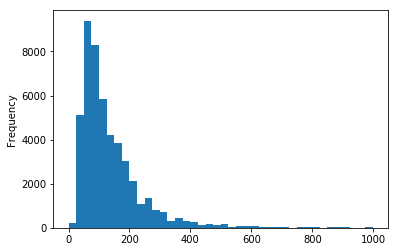

In [4]:
df.price[(df.price < 1000)].plot(kind='hist', bins=40)
df.price.describe(percentiles=list(np.arange(0,1,.1)))

count    48852.000000
mean        56.298610
std         97.370615
min          0.000000
0%           0.000000
10%         22.500000
20%         28.330000
30.0%       33.330000
40%         39.500000
50%         45.000000
60.0%       50.000000
70%         60.000000
80%         73.330000
90%         95.000000
max      10000.000000
Name: price_p_person, dtype: float64

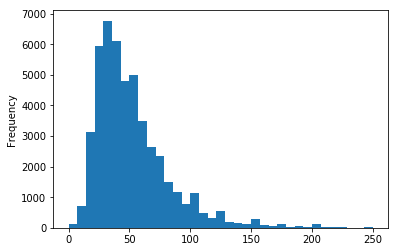

In [5]:
df.price_p_person[(df.price_p_person < 250)].plot(kind='hist', bins=35)
df.price_p_person.describe(percentiles=list(np.arange(0,1,.1)))

In [6]:
columns = ['price','superhost','business','price_p_person','latitude','longitude']
aggs = df.groupby('neighborhood')[columns].agg({'average':'mean', 'count':'count'})
aggs.columns = aggs.columns.get_level_values(1)

/Users/user/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [7]:
colnames = {'price':'avg_price','superhost':'avg_superhost',
            'business':'avg_business','price_p_person':'avg_price_p_person',
            'latitude':'avg_lat','longitude':'avg_long'}
aggs = aggs.reset_index().iloc[:,:8].rename(colnames, axis='columns')
aggs['count'] = aggs.iloc[:,-1]

In [8]:
data = pd.merge(df, aggs, how='left', on='neighborhood')
cnt = data.iloc[:, -1]
data = data.iloc[:, :19]
data['count'] = cnt
data.head(2)

,id,neighborhood,price,city,state,zipcode,accommodates,latitude,longitude,superhost,property_type,business,price_p_person,avg_price,avg_superhost,avg_business,avg_price_p_person,avg_lat,avg_long,count
0,2515,Harlem,59,New York,NY,10026,2,40.799205,-73.953676,False,Apartment,False,29.50,113.246533,0.158460,0.044383,45.265728,40.816065,-73.948108,2884
1,2539,Kensington,39,Brooklyn,NY,11218,4,40.647486,-73.972370,True,Apartment,False,9.75,84.391813,0.087719,0.011696,36.043041,40.641638,-73.975724,171


In [11]:
data.to_csv('data/clean_latlong.csv')